In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
train_data = pd.read_csv(r"C:\Users\shara\Documents\hand-written-digits-recognizer\train.csv")
test_data = pd.read_csv(r"C:\Users\shara\Documents\hand-written-digits-recognizer\test.csv")

In [10]:
import os

train_path = r"C:\Users\shara\Documents\hand-written-digits-recognizer\train.csv"
test_path = r"C:\Users\shara\Documents\hand-written-digits-recognizer\test.csv"

# Check if files exist
print(f"Train file exists: {os.path.exists(train_path)}")
print(f"Test file exists: {os.path.exists(test_path)}")


Train file exists: True
Test file exists: True


In [11]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

x_train = train_data.iloc[:, 1:].values.reshape(-1, 28, 28)  # Reshape to 28x28
y_train = train_data.iloc[:, 0].values

x_test = test_data.values.reshape(-1, 28, 28)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (42000, 28, 28), y_train shape: (42000,)
x_test shape: (571, 28, 28)


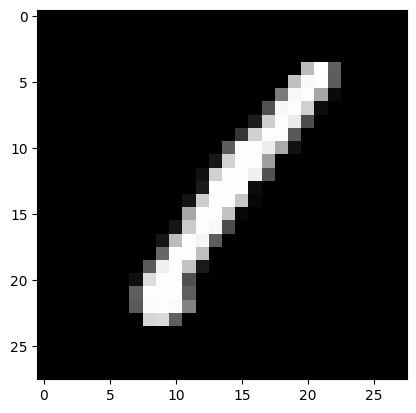

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [13]:
x_test = test_data.values.reshape(-1, 28, 28)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (42000, 28, 28), y_train shape: (42000,)
x_test shape: (571, 28, 28)


In [14]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input (28x28 images with 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding for classification
y_train = to_categorical(y_train, 10)

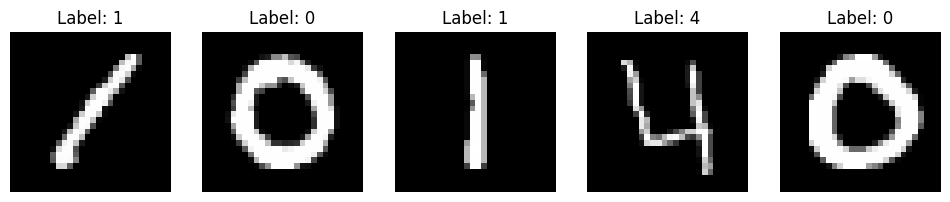

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i in range(5):
    axes[i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {np.argmax(y_train[i])}")
    axes[i].axis('off')
plt.show()

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\shara\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)


In [18]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history= model.fit(x_train,y_train, epochs=10, batch_size=64,validation_split= 0.1)

Epoch 1/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.5457 - loss: 1.4567 - val_accuracy: 0.9374 - val_loss: 0.2404
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9112 - loss: 0.3118 - val_accuracy: 0.9583 - val_loss: 0.1457
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9426 - loss: 0.2064 - val_accuracy: 0.9643 - val_loss: 0.1162
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9536 - loss: 0.1596 - val_accuracy: 0.9712 - val_loss: 0.0946
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9567 - loss: 0.1440 - val_accuracy: 0.9736 - val_loss: 0.0858
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9642 - loss: 0.1188 - val_accuracy: 0.9762 - val_loss: 0.0744
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.9665 - loss: 0.1103 - val_accuracy: 0.9767 - val_loss: 0.0725
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9707 - loss: 0.0966 - 

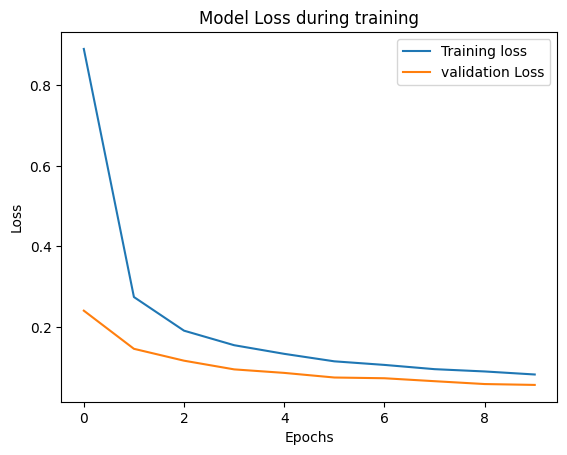

In [20]:
plt.plot(history.history['loss'], label='Training loss'),
plt.plot(history.history['val_loss'], label= 'validation Loss'),
plt.xlabel("Epochs"),
plt.ylabel("Loss"),
plt.title('Model Loss during training'),
plt.legend(),
plt.show()

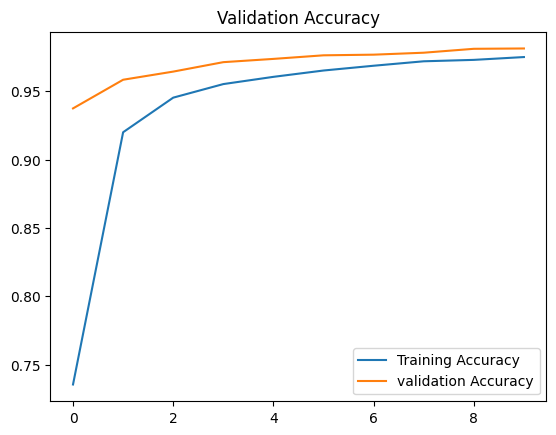

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy'),
plt.plot(history.history['val_accuracy'], label='validation Accuracy'),
plt.title("Validation Accuracy")
plt.legend(),
plt.show()

In [22]:
prediction= model.predict(x_test)

print(f"shape of prediction: {prediction.shape}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
shape of prediction: (571, 10)


In [23]:
predicted_labels= np.argmax(prediction,axis=1)
print(f"Predicted Labels:{predicted_labels[:10]}")

Predicted Labels:[2 0 9 9 3 7 0 3 0 3]


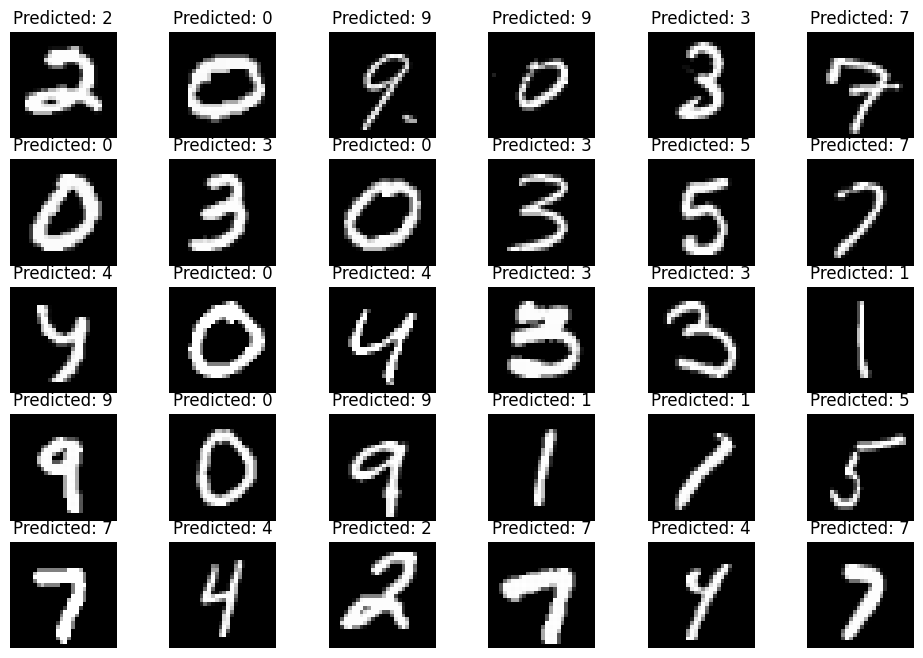

In [24]:
# Plot first 10 test images with predictions
plt.figure(figsize=(12, 8))
for i in range(30):
    plt.subplot(5, 6, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()